In [2]:
### IMPORTIERE PAKETE
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans

from loadmodelingfunctions import generate_loadprofile, build_example_year, visualize_typedays, mape_simulation
import loaddata
import clustertools as ct
import dataprocessing as dp

### AUTORELOAD
%reload_ext autoreload
%autoreload 2

### LATEX-KOMPILIERUNG
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": '16'
})

In [3]:
coeff=[-3.92e-10, 3.20e-7, -7.02e-5,2.1e-3,1.24]
#dym_polynom=np.poly1d(coeff)
H0 = pd.read_excel('H0.xlsx',header=(0,1),index_col=0)

jahr=build_example_year(H0,coeff)

999129.522203391


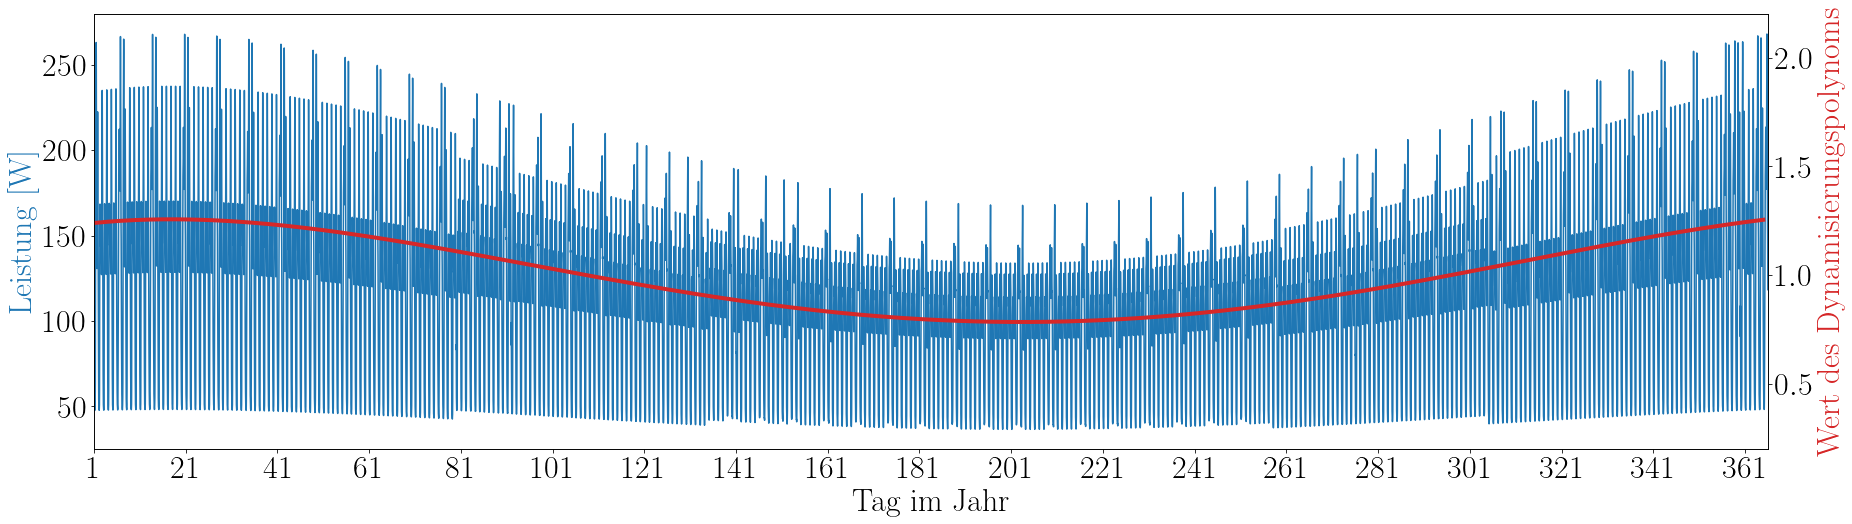

In [39]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": '32'
})
fig,ax = plt.subplots(figsize=(30,8))
ax.plot(X,jahr)
# set x-axis label
ax.set_xticks(np.arange(0,35040,1920),np.arange(0,366,20)+1)
ax.set_xlabel("Tag im Jahr")
# set y-axis label
ax.set_ylabel("Leistung [W]",color='tab:blue')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Xstrich,Ypoly,color='tab:red',linewidth=4)
ax2.set_ylabel("Wert des Dynamisierungspolynoms",color='tab:red')
ax2.set_xlim([0,35040])
ax2.set_ylim([0.2,2.2])
plt.savefig('export/Dynamisierungspolynom.pdf',bbox_inches='tight')

Logistische Regression

In [1]:
from sklearn.linear_model import LogisticRegression

In [16]:
x = np.arange(10).reshape(-1, 1)
xstrich = np.arange(0,10,0.1).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)
#model.fit(x, y)
z = model.predict_proba(xstrich)[:,1]


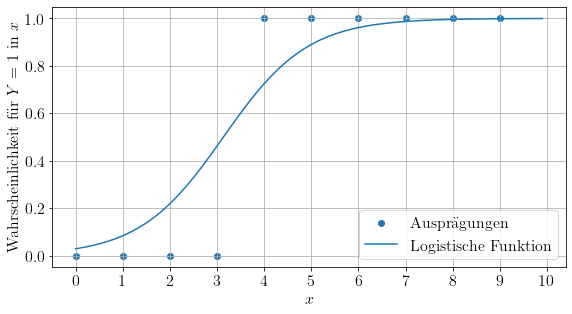

In [25]:
plt.figure(figsize=(9.2,4.8))
plt.grid()
plt.scatter(x,y)
plt.plot(xstrich,z)
plt.legend(['Ausprägungen','Logistische Funktion'], loc='lower right')
plt.xticks(np.linspace(0,10,11))
plt.xlabel('$x$')
plt.ylabel('Wahrscheinlichkeit für $Y=1$ in $x$')
plt.savefig('export/Logistic_Function.pdf',bbox_inches='tight')

In [13]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

DTW

In [3]:
T=np.linspace(0,14,15)
X=np.zeros(15)
Y=np.zeros(15)

t=np.linspace(-4,4,9)


X[2:11]=4-0.25*t**2
Y[4:13]=4-0.25*t**2

In [5]:
with open('logtikz.txt','w') as f:
    for i in range(0,15):
        text='\\node (u' + str(i) + ') at (' + str(i) + ',' + str(X[i]) + ') [blau] {};\n'
        f.writelines(text)
        text='\\node (v' + str(i) + ') at (' + str(i) + ',' + str(Y[i]) + ') [rot] {};\n'
        f.writelines(text)

GMM

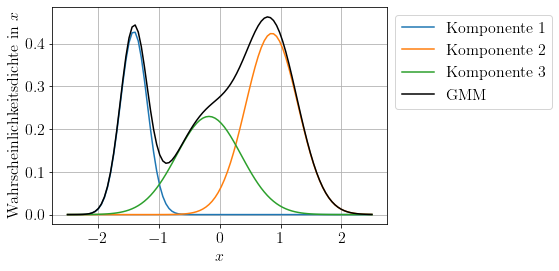

In [ ]:
X=np.linspace(-2.5,2.5,100)
Y=np.zeros(100)
for i in range(0,3):
    mu = gmm[0].means_[i]
    sigma = math.sqrt(gmm[0].covariances_[i])
    weight = gmm[0].weights_[i]
    Y=Y+weight*scipy.stats.norm.pdf(X, mu, sigma).T
    plt.plot(X,weight*scipy.stats.norm.pdf(X, mu, sigma).T)
plt.plot(X,Y,color='black')
plt.xlabel('$x$')
plt.ylabel('Wahrscheinlichkeitsdichte in $x$')
plt.legend(['Komponente 1', 'Komponente 2', 'Komponente 3', 'GMM'],bbox_to_anchor=(1,1))
plt.grid()
plt.savefig('export/GMM.pdf',bbox_inches='tight')

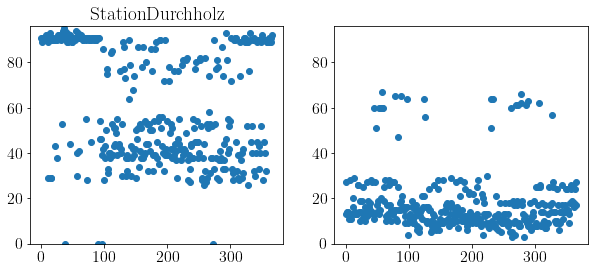

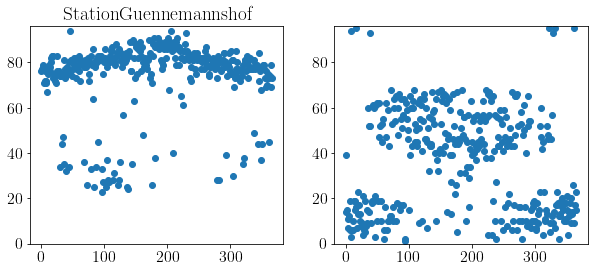

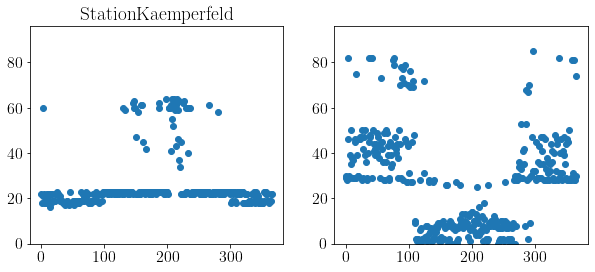

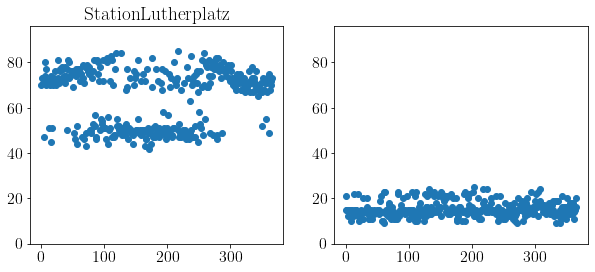

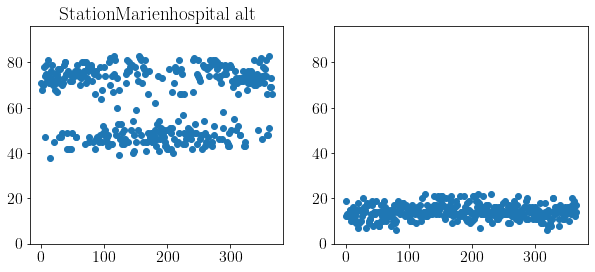

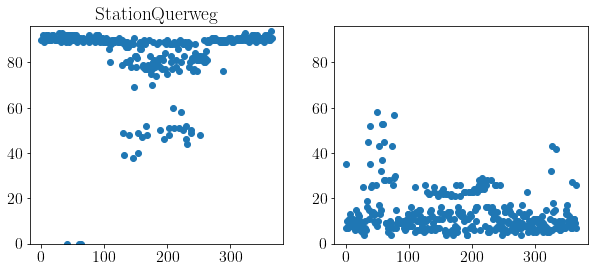

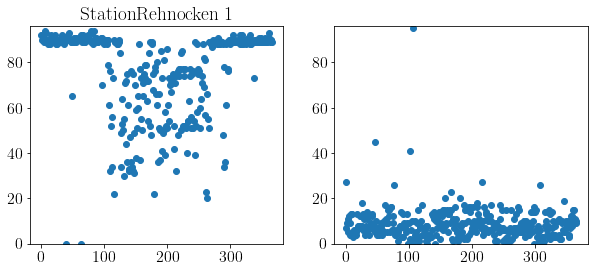

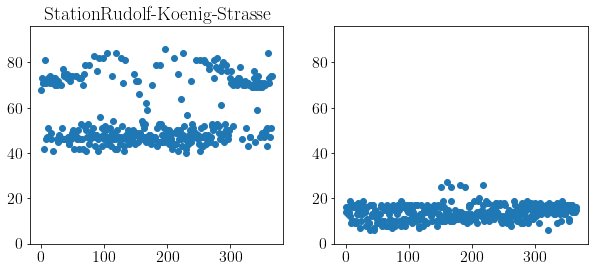

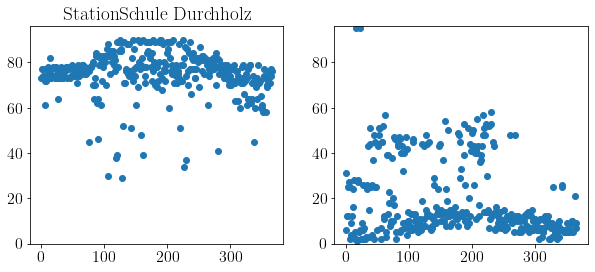

In [ ]:
for j in range(0,9):
    maxes=np.zeros(365)
    mines=np.zeros(365)
    for i in range(0,365):
        maxes[i]=np.argmax(list_power_yd[j][2018].to_numpy()[:,i])
        mines[i]=np.argmin(list_power_yd[j][2018].to_numpy()[:,i])
    subfig, axs=plt.subplots(1,2,figsize=(10,4))
    axs[0].set_title('Station' + stationen['Name'].iloc[j])
    axs[0].scatter(np.linspace(0,366,365),maxes)
    axs[0].set_ylim([0,96])
    axs[1].scatter(np.linspace(0,366,365),mines)
    axs[1].set_ylim([0,96])